
# Project: Investigate a TMBD Movies Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

- The data I am using is the data for movies. Data are collected from The Movie Data Base through Kagle.
- Each record represnts a movie with its information like (cast, company, budget, revenue, release date, popularity..).
- the size of data is around 10,000 records.
- In this report I will try to find out if the new movies are better in the people's opinion. Also, to see if the length if the movie has effect on how good the movie is in people's opinion as well.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv") #loading the data
df.head() # exploring the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape #size of the data

(10866, 21)

10866 movies record with 21 attributes

In [4]:
df.info() # type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As shown above, many columns have missing data. if the column is needed we would clean it otherwise, we just drop it.

In [5]:
df.describe() #statistic information about the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df[df.duplicated()] #duplicated values

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There is only one duplicated record where all attributes matches. I am keeping the first record and dropping the second.

In [7]:
df[df["revenue"]==0].count() # checking for missing values in revenue

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [8]:
df[df["budget"]==0].count() # checking for missing values in badget

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

As we see the revenue and the budget has a lot of 0 values where we can't use for analysis since it is almost half od the data nether we can remove these rows which is also huge loose of data. The better solution in my opinion is to drop these cloumns.



### Data Cleaning (Replace this with more specific notes!)

### There are extra information that I am not going to use. Next I am going to drop them:
* **id**                      drop 
* **imdb_id**                 drop
* **popularity**              drop
* **budget**                  drop for the reason mentioned previuosly
* **revenue**                 drop for the reason mentioned previuosly
* **original_title**          drop
* **cast**                    drop
* **homepage**                drop
* **director**                drop
* **tagline**                 drop
* **keywords**                drop
* **overview**                drop
* **runtime**                 10866 non-null int64
* **genres**                  10843 non-null object
* **production_companies**    drop 
* **release_date**            10866 non-null object
* **vote_count**              10866 non-null int64
* **vote_average**            10866 non-null float64
* **release_year**            10866 non-null int64
* **budget_adj**              drop for the reason mentioned previuosly
* **revenue_adj**             drop for the reason mentioned previuosly

In [9]:
df.drop(["id","imdb_id","original_title","cast","homepage","director","tagline","keywords","overview","revenue","budget","production_companies","budget_adj","revenue_adj"], axis=1, inplace=True) #dropping not needed columns

Dropping duplicated rows in the next step

In [10]:
df.drop_duplicates(keep="first", inplace=True) #dropping duplicates

In [11]:
df.info() #checking after removing duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity      10865 non-null float64
runtime         10865 non-null int64
genres          10842 non-null object
release_date    10865 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 679.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Are poeple liking movies more each year?

For this question I am focusing on the release year, vote average, vote count, population columns.

**First of all** we need to compare the yearly voting. There are multiple movies each year. We will use the average of the votes for each year and to be presented in a line chart.

Text(0.5,1,'Rating Average per Year')

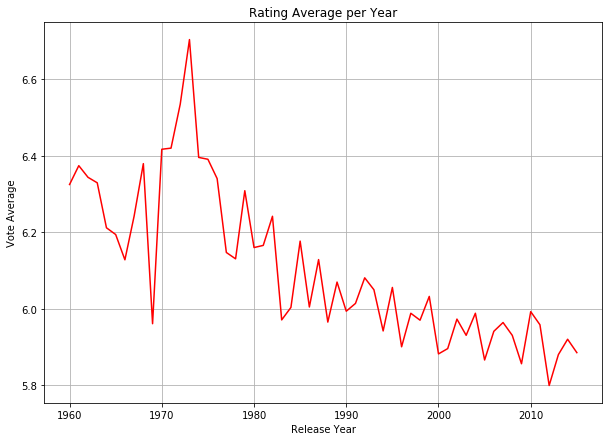

In [12]:
va=df.groupby("release_year").vote_average.mean().plot(figsize=(10,7),grid=True,color='r') #plotting vote average per year
va.set_xlabel("Release Year") #labeling x axis
va.set_ylabel("Vote Average") #labeling y axis
va.set_title("Rating Average per Year") #adding a title


As show in the graph the Raitng is decreasing while we move forward in years.

**Second,** We need to see if the popularity is affected with the same ratio. So we will draw a graph to represent avrage population for each year.

Text(0.5,1,'Popularity Rating Average per Year')

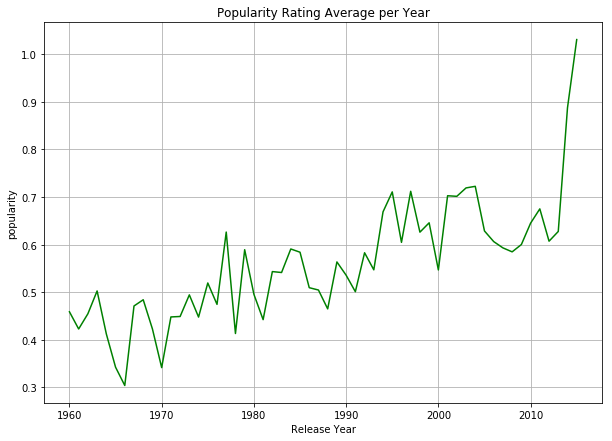

In [13]:
va=df.groupby("release_year").popularity.mean().plot(figsize=(10,7),grid=True,color='g') #plotting poplarity per year
va.set_xlabel("Release Year") #labeling x axis
va.set_ylabel("popularity") #labeling y axis
va.set_title("Popularity Rating Average per Year") #adding a title

Although, we can see that votings are going down and popularity going up but we need to consider number of votes per year. This so we can be sure the voting is not biased.

**Finally,** Since the poplarity gave different result than the raitng we need to check the number of voters for the raitngs.

Text(0.5,1,'Number of Votes Average per Year')

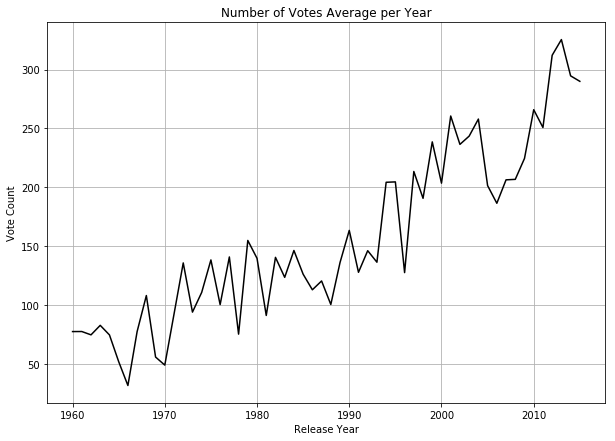

In [14]:
va=df.groupby("release_year").vote_count.mean().plot(figsize=(10,7),grid=True,color='k') #plotting votes count per year
va.set_xlabel("Release Year") #labeling x axis
va.set_ylabel("Vote Count") #labeling y axis
va.set_title("Number of Votes Average per Year") #adding a title

The number of votes increased over the years which might affected the votes it self.

### Are Lengthy Movies liked by people more?

I will use popularity and the votes average to calculate how much people likes lengthy movies. To compare the popularity and the vote average we need to mak them use the same numbers.

In [15]:
df["rounded_vote"]=df['vote_average'].round(0) #rounding votes average so it can be grouped by
df["rounded_pop"]=(df['popularity']/32*9).round(0) # normalizing and rounding popularuty so it can be grouped by


We need to plot both popularity and votes to the length of the movie since they are the metures to know how much people likes a movie.

Text(0.5,1,'Runtime vs Movies Score')

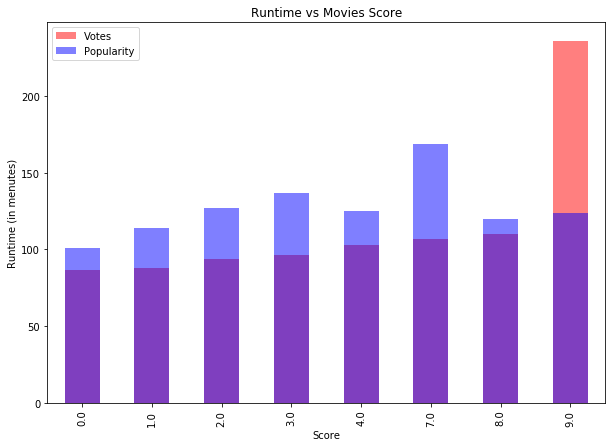

In [16]:
vp=df.groupby("rounded_vote").runtime.mean().plot(figsize=(10,7),kind="bar", alpha=0.5 , color='r' ,legend="True", label="Votes") #plotting the votes
vp=df.groupby("rounded_pop").runtime.mean().plot(figsize=(10,7),kind="bar", alpha=0.5, color='b', legend="True", label="Popularity") #plotting the popularity
vp.set_xlabel("Score") #labeling x axis
vp.set_ylabel("Runtime (in menutes)") #labeling y axis
vp.set_title("Runtime vs Movies Score") #adding a title

The length of the movie doesn't affect its popularity. On the other hand, Votes have shown that people like lengthy movies.

<a id='conclusions'></a>
## Conclusions
- One of the most limitation I faced was the missing values. Specially, in the revenue and the budget. Which made me not able to explore people satsifaction through the revenue. Also, the data is almost 5 years old where it will be better if we could include the last 5 years in it.
- In conclusion, new movies are more popular than the old ones but the people tend to like it less. and the lengthier the movie the more people liking it and there is no major effect on the popularity of the movie with the length of the movie.